<p>With special thanks to Cody, I have selected giant stars from the sspp data by cutting out the others. The cuts were made based on log(g) and Teff parameters. Values of 0$\lt$log(g)$\lt$3.8 and 4050$\lt$Teff$\lt$5875 were kept in the data set. A diagonal cut was also made by cutting below the line passing through point (Teff=4035,log(g)=1.86) with a slope of 0.00345. I exported the data into a fitz table.  </p>

In [20]:
#Load astropy
from astropy.io import fits
from astropy.table import Table
from numpy import array

#Load data
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Ho2017_Catalog.fits',1)
spec2 = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppOut-dr10.fits.gz',1)

In [32]:
#Making cuts in data

#Create table out of spec2
Spec2Table = Table(spec2)

#Remove unwanted rows
#Create a list of all rows for removal
specRowRemove=[]
for n in range(len(Spec2Table)):
    if Spec2Table['TEFF_ADOP'][n]<4050:
        specRowRemove.append(n)
for n in range(len(Spec2Table)):
    if Spec2Table['TEFF_ADOP'][n]>5875:
        specRowRemove.append(n)
for n in range(len(Spec2Table)):
    if Spec2Table['LOGG_ADOP'][n]<0:
        specRowRemove.append(n)
for n in range(len(Spec2Table)):
    if (Spec2Table['LOGG_ADOP'][n]-1.86)/(Spec2Table['TEFF_ADOP'][n]- 4035)>0.00345:
        specRowRemove.append(n)
for n in range(len(Spec2Table)):
    if Spec2Table['LOGG_ADOP'][n]>3.8:
        specRowRemove.append(n)
        
#Use the list to remove the rows from Spec2Table
Spec2Table.remove_rows(specRowRemove)

In [34]:
Spec2Table

SPECOBJID,PLATEID,BESTOBJID,FLUXOBJID,TARGETOBJID,SPECPRIMARY,SPECLEGACY,SPECSEGUE,SPECSEGUE1,SPECSEGUE2,PLUG_RA,PLUG_DEC,LEGACY_TARGET1,LEGACY_TARGET2,SPECIAL_TARGET1,SPECIAL_TARGET2,FIRSTRELEASE,PROGRAMNAME,CHUNK,PLATERUN,RUNSSPP,RUN1D,RUN2D,MJD,PLATE,FIBER,PRIM_TARGET,SPECTYPE_HAMMER,SPECTYPE_SUBCLASS,FLAG,TEFF_ADOP,TEFF_ADOP_N,TEFF_ADOP_UNC,TEFF_HA24,TEFF_HD24,TEFF_TK,TEFF_TG,TEFF_TI,TEFF_NGS1,TEFF_ANNSR,TEFF_ANNRR,TEFF_WBG,TEFF_K24,TEFF_KI13,TEFF_HA24_IND,TEFF_HD24_IND,TEFF_TK_IND,TEFF_TG_IND,TEFF_TI_IND,TEFF_NGS1_IND,TEFF_ANNSR_IND,TEFF_ANNRR_IND,TEFF_WBG_IND,TEFF_K24_IND,TEFF_KI13_IND,TEFF_HA24_UNC,TEFF_HD24_UNC,TEFF_TK_UNC,TEFF_TG_UNC,TEFF_TI_UNC,TEFF_NGS1_UNC,TEFF_ANNSR_UNC,TEFF_ANNRR_UNC,TEFF_WBG_UNC,TEFF_K24_UNC,TEFF_KI13_UNC,LOGG_ADOP,LOGG_ADOP_N,LOGG_ADOP_UNC,LOGG_NGS2,LOGG_NGS1,LOGG_ANNSR,LOGG_ANNRR,LOGG_CAI1,LOGG_CAI2,LOGG_MGH,LOGG_WBG,LOGG_K24,LOGG_KI13,LOGG_NGS2_IND,LOGG_NGS1_IND,LOGG_ANNSR_IND,LOGG_ANNRR_IND,LOGG_CAI1_IND,LOGG_CAI2_IND,LOGG_MGH_IND,LOGG_WBG_IND,LOGG_K24_IND,LOGG_KI13_IND,LOGG_NGS2_UNC,LOGG_NGS1_UNC,LOGG_ANNSR_UNC,LOGG_ANNRR_UNC,LOGG_CAI1_UNC,LOGG_CAI2_UNC,LOGG_MGH_UNC,LOGG_WBG_UNC,LOGG_K24_UNC,LOGG_KI13_UNC,FEH_ADOP,FEH_ADOP_N,FEH_ADOP_UNC,FEH_NGS2,FEH_NGS1,FEH_ANNSR,FEH_ANNRR,FEH_CAIIK1,FEH_CAIIK2,FEH_CAIIK3,FEH_ACF,FEH_CAIIT,FEH_WBG,FEH_K24,FEH_KI13,FEH_NGS2_IND,FEH_NGS1_IND,FEH_ANNSR_IND,FEH_ANNRR_IND,FEH_CAIIK1_IND,FEH_CAIIK2_IND,FEH_CAIIK3_IND,FEH_ACF_IND,FEH_CAIIT_IND,FEH_WBG_IND,FEH_K24_IND,FEH_KI13_IND,FEH_NGS2_UNC,FEH_NGS1_UNC,FEH_ANNSR_UNC,FEH_ANNRR_UNC,FEH_CAIIK1_UNC,FEH_CAIIK2_UNC,FEH_CAIIK3_UNC,FEH_ACF_UNC,FEH_CAIIT_UNC,FEH_WBG_UNC,FEH_K24_UNC,FEH_KI13_UNC,AFE,AFE_IND,AFE_UNC,DIST_DWARF,DIST_TO,DIST_GIANT,DIST_AGB,DIST_FHB,DIST_AP,DIST_Z,RV_FLAG,RV_ADOP,RV_ADOP_UNC,RV_CAL,RV_CAL_UNC,RV_BS,RV_BS_UNC,RV_ELODIE,RV_ELODIE_UNC,RV_GSR,RV_GSR_UNC,V_MAG,BV,BV_BALMER,GR_PREDICT,GR_HA24,GR_HD24,GR_HP,G_MAG,UG,GR,RI,IZ,U_MAG_UNC,G_MAG_UNC,R_MAG_UNC,I_MAG_UNC,Z_MAG_UNC,EBV,SNR,QA,CC_CAHK,CC_MGH,RA,DEC,L,B,TEFF_SPEC,TEFF_SPEC_N,TEFF_SPEC_UNC,LOGG_SPEC,LOGG_SPEC_N,LOGG_SPEC_UNC,FEH_SPEC,FEH_SPEC_N,FEH_SPEC_UNC,TEFF_COL,TEFF_COL_UNC,FEH_TFIX_NGS2,FEH_TFIX_NGS1,LOGG_TFIX_NGS2,LOGG_TFIX_NGS1,FEH_TFIX_NGS2_UNC,FEH_TFIX_NGS1_UNC,LOGG_TFIX_NGS2_UNC,LOGG_TFIX_NGS1_UNC,FEH_TFIX_CAIIK1,FEH_TFIX_CAIIK1_UNC,ACF1,ACF1_SNR,ACF2,ACF2_SNR,INSPECT,ELODIERVFINAL,ELODIERVFINALERR,ZWARNING,SURVEY,PRIMTARGET,SECTARGET,SEGUE1_TARGET1,SEGUE1_TARGET2,SEGUE2_TARGET1,SEGUE2_TARGET2,L_CLASS,DIST_ADOP,MP_FLAG,TEFF_IRFM,TEFF_IRFM_IND,TEFF_IRFM_UNC,LOGG_NGS1_IRFM,LOGG_NGS1_IRFM_IND,LOGG_NGS1_IRFM_UNC,FEH_NGS1_IRFM,FEH_NGS1_IRFM_IND,FEH_NGS1_IRFM_UNC,LOGG_CAI1_IRFM,LOGG_CAI1_IRFM_IND,LOGG_CAI1_IRFM_UNC,FEH_CAIIK1_IRFM,FEH_CAIIK1_IRFM_IND,FEH_CAIIK1_IRFM_UNC
str22,str19,str19,str19,str22,int32,int32,int32,int32,int32,float64,float64,int32,int32,int64,int64,str3,str23,str16,str16,str3,str1,str3,int32,int16,int16,str13,str4,str20,str5,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16

<IPython.core.display.Javascript object>


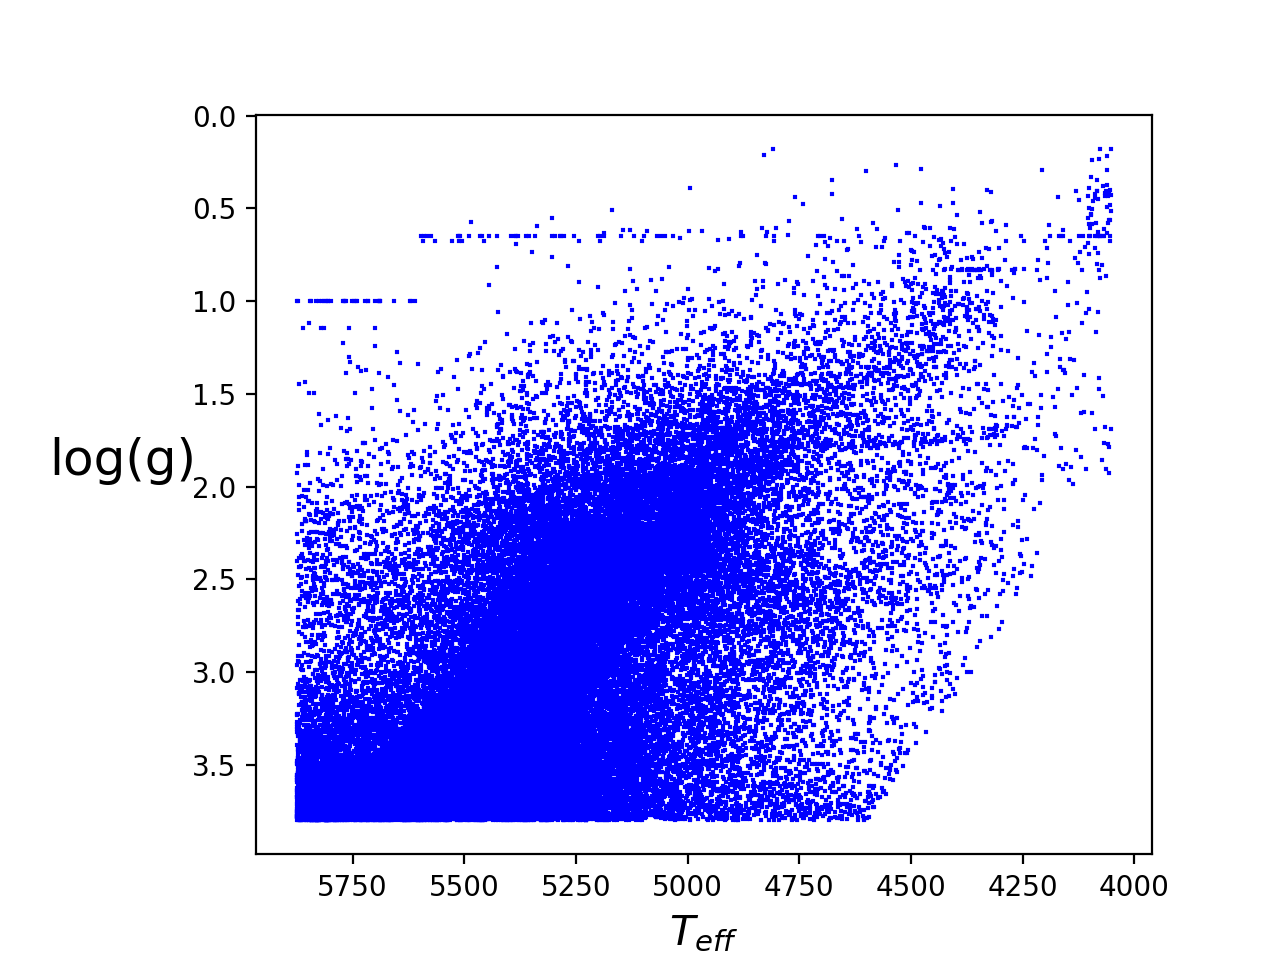

In [47]:
#Plotting logg vs Teff for SSPP data
%matplotlib nbagg
import matplotlib.pyplot as plt
y=Spec2Table['LOGG_ADOP']
x=Spec2Table['TEFF_ADOP']

#plt.figure(figsize=(18,18))
plt.scatter(x,y,marker='+',c='blue',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=18)
plt.gcf().subplots_adjust(left=0.20)
#plt.xlim(3000,7000)
#plt.ylim(0,6)
plt.figsize=(18,16)

ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()

plt.show()

In [43]:
Spec2Table.write('ssppgiants.fits', format='fits')